In [1]:
# Czym są kolejne df
# df1 - dane początkowe
# df2 - dane df1 bez niepotrzebnych kolumn
# df3 - dane df2 z uproszczonymi adresami (other bądź faktyczny adres, jeśli jest powtarzalny)
# df4 - dane df3 z usuniętymi wartościami skrajnymi
# df5 - dane df4 z usuniętymi polami gdy cena mieszkania z 2 pokojami przewyższa cenę z 3 pokojami
# df6 - dane df1 z kolumną prize_per_sq oraz z usuniętymi ekstramalnymi wartościami cenowymi
# df7 - dane df6 z podziałem na dzielnice zamiast adresów
# df8 - dane z df7 rozszerzone o konkatenację miast i dzielnic
# df9 - dane z df8 po usunięciu współrzędnych i ceny

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df1 = pd.read_csv("Houses.csv", encoding='windows-1250')
df1.head()

,no,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Południe Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznań,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [4]:
df1.shape

(23764, 11)

In [5]:
df2 = df1.drop(["no","latitude", "longitude", "id"], axis='columns')

In [6]:
df2.head(10)

,address,city,floor,price,rooms,sq,year
0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,749000.0,3.0,74.05,2021.0
1,Praga-Południe Grochowska,Warszawa,3.0,240548.0,1.0,24.38,2021.0
2,Krowodrza Czarnowiejska,Kraków,2.0,427000.0,2.0,37.00,1970.0
3,Grunwald,Poznań,2.0,1290000.0,5.0,166.00,1935.0
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,996000.0,5.0,105.00,2020.0
5,Nowa Huta Czyżyny ul. Woźniców,Kraków,2.0,414600.0,1.0,34.55,2022.0
6,Podgórze Płaszów Koszykarska,Kraków,0.0,750000.0,4.0,81.40,2021.0
7,Mokotów Pory,Warszawa,10.0,2890000.0,6.0,280.00,2003.0
8,Ursynów Wyżyny,Warszawa,3.0,615000.0,4.0,63.40,1982.0
9,Bemowo,Warszawa,1.0,429000.0,1.0,40.00,1999.0


In [7]:
df2.isnull().sum()

address    0
city       0
floor      0
price      0
rooms      0
sq         0
year       0
dtype: int64

In [8]:
# dodanie nowej kolumny cena za metr
df3 = df2.copy()
df3['price_per_sq'] = df3['price'] / df3['sq']

In [9]:
df3.head()

,address,city,floor,price,rooms,sq,year,price_per_sq
0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,749000.0,3.0,74.05,2021.0,10114.787306
1,Praga-Południe Grochowska,Warszawa,3.0,240548.0,1.0,24.38,2021.0,9866.611977
2,Krowodrza Czarnowiejska,Kraków,2.0,427000.0,2.0,37.00,1970.0,11540.540541
3,Grunwald,Poznań,2.0,1290000.0,5.0,166.00,1935.0,7771.084337
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,996000.0,5.0,105.00,2020.0,9485.714286


In [10]:
# ilość unikatowych adresów
len(df3.address.unique())

5419

In [11]:
df3.address = df3.address.apply(lambda x: x.strip())

address_stats = df3.groupby('address')['address'].agg('count').sort_values(ascending=False)
address_stats

address
Mokotów                                          426
Wola                                             384
Nowe Miasto Malta ul. Katowicka                  377
Śródmieście                                      352
Białołęka                                        248
                                                ... 
Praga-Północ Nowa Praga Plac Hallera               1
Praga-Północ Nowa Praga Stefana Starzyńskiego      1
Praga-Północ Nowa Praga Strzelecka                 1
Praga-Północ Nowa Praga Wileńska 16                1
Żoliborz Żoliborz Artystyczny                      1
Name: address, Length: 5392, dtype: int64

In [12]:
len(address_stats[address_stats<=10])

5084

In [13]:
address_stats_less_than_10 = address_stats[address_stats<=10]
df3.address = df3.address.apply(lambda x: 'Other' if x in address_stats_less_than_10 else x)

In [14]:
len(df3.address.unique())

309

In [15]:
df3.price_per_sq.describe()

count     23764.000000
mean      10760.979594
std        3861.161601
min           1.000000
25%        8400.000000
50%        9947.958273
75%       12318.157708
max      138636.363636
Name: price_per_sq, dtype: float64

In [16]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city'):
        m = np.mean(subdf.price_per_sq)
        st = np.std(subdf.price_per_sq)
        reduced_df = subdf[(subdf.price_per_sq>(m-st)) & (subdf.price_per_sq <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df4 = remove_outliers(df3)
df4.shape

(19306, 8)

In [17]:
#df4 jest bez ekstremalnie malych i ekstremalnie duzych cen ( -4k rows :) )

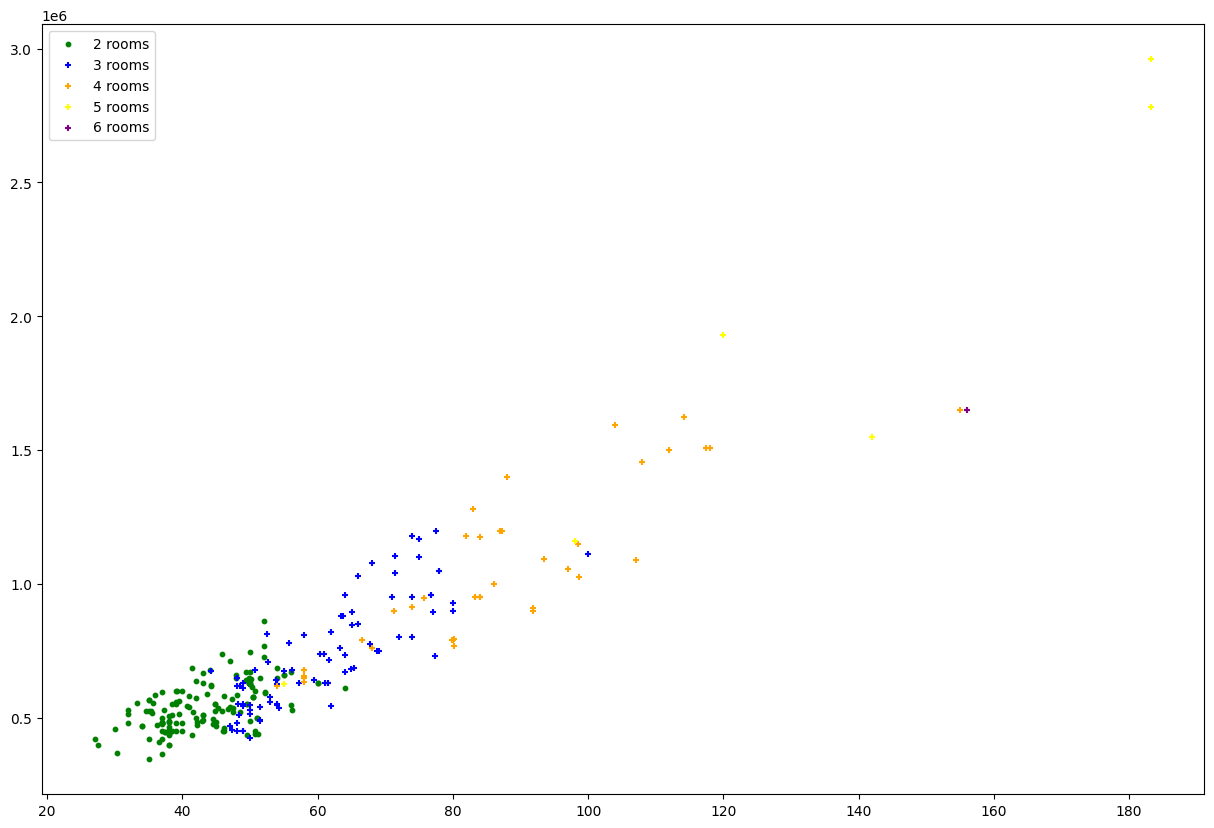

In [18]:
def plot_scatter(df, location, address):
    rooms2 = df[(df.city == location) & (df.rooms == 2) & (df.address == address)]
    rooms3 = df[(df.city == location) & (df.rooms == 3) & (df.address == address)]
    rooms4 = df[(df.city == location) & (df.rooms == 4) & (df.address == address)]
    rooms5 = df[(df.city == location) & (df.rooms == 5) & (df.address == address)]
    rooms6 = df[(df.city == location) & (df.rooms == 6) & (df.address == address)]
    rooms7 = df[(df.city == location) & (df.rooms == 7) & (df.address == address)]
    rooms8 = df[(df.city == location) & (df.rooms == 8) & (df.address == address)]
    rooms9 = df[(df.city == location) & (df.rooms == 9) & (df.address == address)]
    rooms10 = df[(df.city == location) & (df.rooms == 10) & (df.address == address)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(rooms2.sq, rooms2.price, color='green', label='2 rooms', s=10)
    plt.scatter(rooms3.sq, rooms3.price, marker='+', color='blue', label='3 rooms', s=20)
    plt.scatter(rooms4.sq, rooms4.price, marker='+', color='orange', label='4 rooms', s=20)
    plt.scatter(rooms5.sq, rooms5.price, marker='+', color='yellow', label='5 rooms', s=20)
    plt.scatter(rooms6.sq, rooms6.price, marker='+', color='purple', label='6 rooms', s=20)
    plt.legend()

plot_scatter(df4, 'Warszawa', 'Wola')

In [19]:
# Funkcja pozbywa się wierszy, gdzie według wzoru jest różnica cenowa między dwoma miejscami w tej samej lokalizacji, 
# ale że np cena za trzy pokoje jest mniejsza niż za dwa  liczba danych jest większa niż 5

def remove_by_rooms_price_diff(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('city'):
        rooms_stats = {}
        for rooms, rooms_df in location_df.groupby('rooms'):
            rooms_stats[rooms] = {
                'mean':np.mean(rooms_df.price_per_sq),
                'std':np.std(rooms_df.price_per_sq),
                'count':rooms_df.shape[0]
            }
        for rooms, rooms_df in location_df.groupby('rooms'):
            stats = rooms_stats.get(rooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, rooms_df[rooms_df.price_per_sq<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [20]:
df5 = remove_by_rooms_price_diff(df4)
df5.shape


(7871, 8)

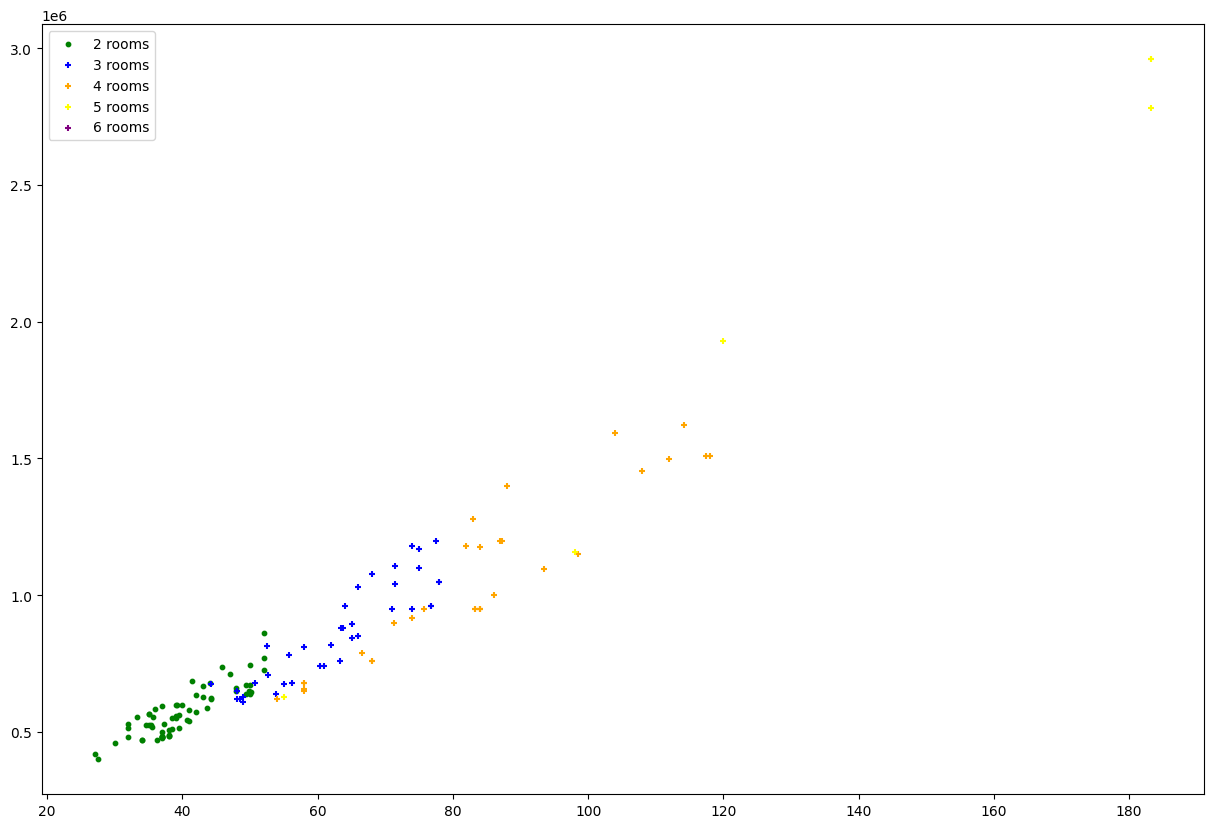

In [21]:
def plot_scatter(df, location, address):
    rooms2 = df[(df.city == location) & (df.rooms == 2) & (df.address == address)]
    rooms3 = df[(df.city == location) & (df.rooms == 3) & (df.address == address)]
    rooms4 = df[(df.city == location) & (df.rooms == 4) & (df.address == address)]
    rooms5 = df[(df.city == location) & (df.rooms == 5) & (df.address == address)]
    rooms6 = df[(df.city == location) & (df.rooms == 6) & (df.address == address)]
    rooms7 = df[(df.city == location) & (df.rooms == 7) & (df.address == address)]
    rooms8 = df[(df.city == location) & (df.rooms == 8) & (df.address == address)]
    rooms9 = df[(df.city == location) & (df.rooms == 9) & (df.address == address)]
    rooms10 = df[(df.city == location) & (df.rooms == 10) & (df.address == address)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(rooms2.sq, rooms2.price, color='green', label='2 rooms', s=10)
    plt.scatter(rooms3.sq, rooms3.price, marker='+', color='blue', label='3 rooms', s=20)
    plt.scatter(rooms4.sq, rooms4.price, marker='+', color='orange', label='4 rooms', s=20)
    plt.scatter(rooms5.sq, rooms5.price, marker='+', color='yellow', label='5 rooms', s=20)
    plt.scatter(rooms6.sq, rooms6.price, marker='+', color='purple', label='6 rooms', s=20)
    plt.legend()

plot_scatter(df5, 'Warszawa', 'Wola')

In [22]:
df5.head(5)

,address,city,floor,price,rooms,sq,year,price_per_sq
0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,749000.0,3.0,74.05,2021.0,10114.787306
1,Other,Kraków,2.0,427000.0,2.0,37.00,1970.0,11540.540541
2,Nowa Huta Czyżyny ul. Woźniców,Kraków,2.0,414600.0,1.0,34.55,2022.0,12000.000000
5,Stare Miasto,Kraków,0.0,949000.0,2.0,84.80,1936.0,11191.037736
7,Other,Kraków,4.0,699000.0,2.0,60.00,2010.0,11650.000000


In [23]:
# ta 5ka strasznie dużo zjada tych danych, ja bym na tą chwilę został przy 4ce
df4.shape

(19306, 8)

In [24]:
# Trzeba przygotować nowy df, bo na początku wywaliliśmy koordynacje i uprościliśmy zapis adresów
df6 = df1.drop(["no", "id"], axis='columns')
df6['price_per_sq'] = df6['price'] / df6['sq']
df6 = remove_outliers(df6)

In [25]:
df6.shape

(19306, 10)

In [26]:
len(df6.address.unique())

4616

In [27]:
print(f'Krk:{len(df6[df6.city == "Kraków"].address.unique())}')
print(f'WWa:{len(df6[df6.city == "Warszawa"].address.unique())}')
print(f'Pzn:{len(df6[df6.city == "Poznań"].address.unique())}')

Krk:1587
WWa:2504
Pzn:528


In [28]:
# df6.to_csv("temp_df.csv", index=False, encoding='utf-8') # eksport df6
# df5.to_csv("temp_df.csv", index=False, encoding='utf-8') # eksport df5

In [29]:
df7 =  pd.read_csv("neighborhood_df.csv", encoding="utf-8")
# df7 =  pd.read_csv("neighborhood2_df.csv", encoding="utf-8") # testowe wykonanie dla df obciętego o remove_by_rooms_price_diff()

In [30]:
df7.head(5)

,address,city,floor,latitude,longitude,price,rooms,sq,year,price_per_sq
0,Podgórze,Kraków,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0,10114.787306
1,Krowodrza,Kraków,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0,11540.540541
2,Nowa Huta,Kraków,2.0,50.046943,19.997153,414600.0,1.0,34.55,2022.0,12000.000000
3,Podgórze,Kraków,0.0,50.049893,19.990603,750000.0,4.0,81.40,2021.0,9213.759214
4,Nowa Huta,Kraków,1.0,50.046943,19.997153,756707.4,4.0,82.43,2021.0,9180.000000


In [31]:
df7.shape

(19303, 10)

In [32]:
# Trochę się udało poprawić wyniki :)
# To są unikalne dzielnice dla każdego miasta
print(f'Krk:{len(df7[df7.city == "Kraków"].address.unique())}')
print(f'WWa:{len(df7[df7.city == "Warszawa"].address.unique())}')
print(f'Pzn:{len(df7[df7.city == "Poznań"].address.unique())}')

Krk:17
WWa:18
Pzn:5


In [33]:
print("Krw")
print(df7[(df7.city == "Kraków")].address.unique())
print("Wwa")
print(df7[(df7.city == "Warszawa")].address.unique())
print("Pzn")
print(df7[(df7.city == "Poznań")].address.unique())

Krw
['Podgórze' 'Krowodrza' 'Nowa Huta' 'Stare Miasto' 'Prądnik Biały'
 'Dębniki' 'Zwierzyniec' 'Podgórze Duchackie' 'Grzegórzki' 'Bronowice'
 'Prądnik Czerwony' 'Bieżanów-Prokocim' 'Mistrzejowice'
 'Łagiewniki-Borek Fałęcki' 'Wzgórza Krzesławickie' 'Bieńczyce'
 'Swoszowice']
Wwa
['Praga-Południe' 'Ochota' 'Mokotów' 'Ursynów' 'Bemowo' 'Śródmieście'
 'Wola' 'Białołęka' 'Wilanów' 'Włochy' 'Żoliborz' 'Ursus' 'Bielany'
 'Targówek' 'Praga-Północ' 'Wesoła' 'Rembertów' 'Wawer']
Pzn
['Grunwald' 'Nowe Miasto' 'Stare Miasto' 'Jeżyce' 'Wilda']


In [34]:
print("Kraków\n------")
krakow_stats = df7.loc[df7['city'] == 'Kraków', 'address'].value_counts().sort_values(ascending=False)
krakow_stats

Kraków
------


address
Podgórze                    1062
Nowa Huta                   1055
Prądnik Biały                787
Podgórze Duchackie           655
Dębniki                      637
Grzegórzki                   574
Mistrzejowice                556
Krowodrza                    404
Stare Miasto                 396
Bieżanów-Prokocim            368
Prądnik Czerwony             345
Bronowice                    333
Zwierzyniec                  140
Łagiewniki-Borek Fałęcki     105
Bieńczyce                     82
Wzgórza Krzesławickie         37
Swoszowice                    19
Name: count, dtype: int64

In [35]:
print("Warszawa\n------")
warszawa_stats = df7.loc[df7['city'] == 'Warszawa', 'address'].value_counts().sort_values(ascending=False)
warszawa_stats

Warszawa
------


address
Mokotów           1391
Wola              1158
Praga-Południe     899
Bemowo             751
Białołęka          634
Śródmieście        501
Bielany            480
Ursynów            472
Ochota             418
Targówek           339
Wilanów            303
Ursus              270
Praga-Północ       255
Żoliborz           241
Włochy             205
Wawer              122
Rembertów           42
Wesoła              16
Name: count, dtype: int64

In [36]:
print("Poznań\n------")
poznan_stats = df7.loc[df7['city'] == 'Poznań', 'address'].value_counts().sort_values(ascending=False)
poznan_stats

Poznań
------


address
Nowe Miasto     951
Grunwald        879
Stare Miasto    829
Jeżyce          459
Wilda           133
Name: count, dtype: int64

In [37]:
# funkcja do dodawnia miasta ze względu na to, że nazwy dzielnic między miastami się powtarzają
dummies = pd.get_dummies(df7.city)
dummies.head(3)

,Kraków,Poznań,Warszawa
0,True,False,False
1,True,False,False
2,True,False,False


In [38]:
df8 = pd.concat([df7,dummies],axis='columns')
df8.head(4)

,address,city,floor,latitude,longitude,price,rooms,sq,year,price_per_sq,Kraków,Poznań,Warszawa
0,Podgórze,Kraków,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0,10114.787306,True,False,False
1,Krowodrza,Kraków,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0,11540.540541,True,False,False
2,Nowa Huta,Kraków,2.0,50.046943,19.997153,414600.0,1.0,34.55,2022.0,12000.000000,True,False,False
3,Podgórze,Kraków,0.0,50.049893,19.990603,750000.0,4.0,81.40,2021.0,9213.759214,True,False,False


In [39]:
dummies = pd.get_dummies(df7.address)
dummies.head(3)

,Bemowo,Białołęka,Bielany,Bieńczyce,Bieżanów-Prokocim,Bronowice,Dębniki,Grunwald,Grzegórzki,Jeżyce,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df8 = pd.concat([df8,dummies],axis='columns')
df8.head(3)

,address,city,floor,latitude,longitude,price,rooms,sq,year,price_per_sq,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
0,Podgórze,Kraków,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0,10114.787306,...,False,False,False,False,False,False,False,False,False,False
1,Krowodrza,Kraków,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0,11540.540541,...,False,False,False,False,False,False,False,False,False,False
2,Nowa Huta,Kraków,2.0,50.046943,19.997153,414600.0,1.0,34.55,2022.0,12000.000000,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df9 = df8.drop('address',axis='columns')
df9 = df9.drop('city', axis='columns')
df9.head(3)

,floor,latitude,longitude,price,rooms,sq,year,price_per_sq,Kraków,Poznań,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
0,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0,10114.787306,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0,11540.540541,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,50.046943,19.997153,414600.0,1.0,34.55,2022.0,12000.000000,True,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
X = df9.drop(['price',"latitude", "longitude", "price_per_sq"], axis='columns')
X_columns = X.columns
X.head()

,floor,rooms,sq,year,Kraków,Poznań,Warszawa,Bemowo,Białołęka,Bielany,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
0,2.0,3.0,74.05,2021.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.0,2.0,37.00,1970.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1.0,34.55,2022.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,4.0,81.40,2021.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,4.0,82.43,2021.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
y = df9.price
y.head()

0    749000.0
1    427000.0
2    414600.0
3    750000.0
4    756707.4
Name: price, dtype: float64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [45]:
X_train

,floor,rooms,sq,year,Kraków,Poznań,Warszawa,Bemowo,Białołęka,Bielany,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
9277,3.0,2.0,51.90,2010.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17367,7.0,2.0,64.00,1992.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14818,3.0,3.0,79.00,1938.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7359,5.0,3.0,61.03,2022.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5125,0.0,4.0,65.35,2020.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,2.0,2.0,44.95,2022.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7291,3.0,3.0,77.00,1885.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17728,6.0,1.0,31.01,2017.0,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7293,0.0,2.0,43.00,1950.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8786413553147192

In [47]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87867005, 0.87700863, 0.87467615, 0.87276827, 0.87010141,
       0.87491001, 0.87086454, 0.8765525 , 0.88776855, 0.88496819])

In [48]:
X.head(3)

,floor,rooms,sq,year,Kraków,Poznań,Warszawa,Bemowo,Białołęka,Bielany,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
0,2.0,3.0,74.05,2021.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.0,2.0,37.00,1970.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1.0,34.55,2022.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
# funkcja do szacowania cen
def predict_price(city, district, floor, rooms, sq, year, model):
    district_index = np.where(X.columns==district)[0][0]
    city_index = np.where(X.columns==city)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year
    if district_index >= 0:
        x[district_index] = 1
    if city_index >= 0:
        x[city_index] = 1
    return model.predict([x])[0]

In [50]:
# tutaj jest dziwny komunikat, ale ogólnie to sie wykonuje
# cena originalna: 749000.0
predict_price('Kraków','Podgórze', 2.0, 3.0,	74.05, 2021.0, lr_clf)

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


760484.0399638254

In [51]:
predict_price('Kraków','Nowa Huta', 2.0, 1.0, 34.55, 2022.0, lr_clf)

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


366103.76241259417

In [52]:
print(X.columns)
np.where(X.columns=="Podgórze")[0][0]

Index(['floor', 'rooms', 'sq', 'year', 'Kraków', 'Poznań', 'Warszawa',
       'Bemowo', 'Białołęka', 'Bielany', 'Bieńczyce', 'Bieżanów-Prokocim',
       'Bronowice', 'Dębniki', 'Grunwald', 'Grzegórzki', 'Jeżyce', 'Krowodrza',
       'Mistrzejowice', 'Mokotów', 'Nowa Huta', 'Nowe Miasto', 'Ochota',
       'Podgórze', 'Podgórze Duchackie', 'Praga-Południe', 'Praga-Północ',
       'Prądnik Biały', 'Prądnik Czerwony', 'Rembertów', 'Stare Miasto',
       'Swoszowice', 'Targówek', 'Ursus', 'Ursynów', 'Wawer', 'Wesoła',
       'Wilanów', 'Wilda', 'Wola', 'Wzgórza Krzesławickie', 'Włochy',
       'Zwierzyniec', 'Łagiewniki-Borek Fałęcki', 'Śródmieście', 'Żoliborz'],
      dtype='object')


23

In [53]:
X_train.shape

(15442, 46)

In [54]:
# Ustawienie wszystkich wag na 1
weights = [1 for i in range(len(X_train.columns))]

temp_weights = weights.copy()
samples_splited_by_weight = []

min_weight = 9
max_weight = 10
# Ustawienie zakresu wag dla testów
for weight_value in range(min_weight, max_weight+1, 1):
    # Nazwy próbek
    # Tu można dodawać swoje propozycje. Żeby nie testować wszystkich, można zakomentować niepotrzebne
    # Jako klucz podaje się zbiór próbek oddzielonych '_', a jako wartość wagi
    sample_names = {
        "Cities": [weight_value], 
        "Districts": [weight_value], 
        "Params": [weight_value],
        "Params_Cities1": [weight_value-1, weight_value+1], 
        "Params_Districts1": [weight_value-1, weight_value+1], 
        "Cities_Districts1": [weight_value-1, weight_value+1],
        "Params_Cities2": [weight_value+1, weight_value-1], 
        "Params_Districts2": [weight_value+1, weight_value-1], 
        "Cities_Districts2": [weight_value+1, weight_value-1],
        "Sq": [weight_value],
        "Rooms": [weight_value],
        "Floor": [weight_value],
        "Year": [weight_value],
        "Sq_Districts1": [weight_value-1, weight_value+1],
        "Sq_Districts2": [weight_value+1, weight_value-1],
        "Sq_Cities1": [weight_value-1, weight_value+1],
        "Sq_Cities2": [weight_value+1, weight_value-1],
        "Year_Districts1": [weight_value-1, weight_value+1],
        "Year_Districts2": [weight_value+1, weight_value-1],
        "Year_Cities1": [weight_value-1, weight_value+1],
        "Year_Cities2": [weight_value+1, weight_value-1],
    }
    samples_splited_by_weight.append(sample_names)


def change_weight(column_name, new_weight):
    index = np.where(X.columns==column_name)[0][0]
    weights[index] = new_weight

# Próbka dla wyższych wag miast
def cities_sample(weight_value):
    for city in ["Kraków", "Warszawa","Poznań"]:
        change_weight(city, weight_value) 

# Próbka dla wyższych wag dzielnic
def districts_sample(weight_value):
    for index in range(7, len(X.columns)):
        weights[index] = weight_value   

# Próbka dla wyższych wag parametrów
def params_sample(weight_value):
    for index in range(0, 4):
        weights[index] = weight_value

# Próbka dla wyższej wagi wybranego parametru
def param_sample(weight_value, param_name):
    index = np.where(X.columns==param_name)[0][0]
    weights[index] = weight_value



In [55]:
# Najelpiej prosperujące wagi

sample_names = {
        "Floor": [8],
        "Params_Cities1": [6, 4],
        "Floor2": [7],
        "Year": [5],
        "Year_Cities": [8, 6],
        "Year_Districts": [7, 5],
        "Rooms": [10],
        "Floor3": [3],
        "Params_Districts1": [9, 11],
        "Params_Cities2": [4, 2],
        "Floor_Rooms": [8, 0.1],
        "Params_Cities_Rooms1": [6, 4, 0.1],
        "Floor_Rooms2": [7, 0.1],
        "Year_Rooms": [5, 0.1],
        "Year_Cities_Rooms": [8, 6, 0.1],
        "Year_Districts_Rooms": [7, 5, 0.1],
        "Floor_Rooms3": [3, 0.1],
        "Params_Districts_Rooms1": [9, 11, 0.1],
        "Params_Cities_Rooms2": [4, 2, 0.1]
    }
sample_names_keys = list(sample_names.keys())

samples_splited_by_weight = [
    sample_names
]

In [56]:
import re

def keep_letters(input_string):
    return re.sub(r'[^a-zA-Z]', '', input_string)
    
weighted_weights = []
for sample_names in samples_splited_by_weight:  
    weights_samples = []
    sample_names_keys = list(sample_names.keys())
    for name, weight in sample_names.items():
        samples = name.split("_")
        for i, sample in enumerate(samples):
            if "Params" in sample:
                params_sample(weight[i])
            elif "Districts" in sample:
                districts_sample(weight[i])
            elif "Cities" in sample:
                cities_sample(weight[i])
            else:
                param_sample(weight[i], keep_letters(sample.lower()))           
        weights_samples.append(weights)
        weights = temp_weights.copy()
        
    weighted_weights.append(weights_samples)


In [57]:
test_weights = np.array(weights) 
test_sample_weights = np.dot(X_train, test_weights)
print(test_sample_weights)
print(test_weights)

[2068.9 2067.0 2025.0 ... 2057.01 1997.0 1978.0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [58]:
# Skalowanie danych
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer, QuantileTransformer

# Inicjalizacja obiektów skalera dla różnych metod
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
normalizer = Normalizer()
quantile_transformer = QuantileTransformer()

# Skalowanie danych treningowych dla różnych metod
X_train_min_max_scaled = min_max_scaler.fit_transform(X_train)

# Skalowanie danych testowych dla różnych metod z użyciem parametrów z danych treningowych
X_test_min_max_scaled = min_max_scaler.transform(X_test)

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from datetime import datetime

# Można sobie testować włączając True. Dla tego zestawu robi się to parę godzin
weights_experiments = False 

# Ustawiamy, czy chcemy mieć przeskalowane dane // ogółem to wyniki są słabsze
scaled_data = False

if scaled_data:
    X_train = X_train_min_max_scaled
    X_test = X_test_min_max_scaled
else:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

if weights_experiments:
    results = {}
    w = min_weight
    reps = 5
    # Ilość powtórzeń dla modeli o tych samych wagach dla dokładniejszych wyników
    for weights_samples in weighted_weights: 
        for ww in range(len(weighted_weights[0])):
            results[sample_names_keys[ww]] = 0
            
        for i, current_weights in enumerate(weights_samples):
            for rep in range(reps):
                print(f'weight {w}/{max_weight}, sample {i}/{len(weights_samples)-1}')
                current_weights = np.array(current_weights) 
                sample_weights = np.dot(X_train, current_weights)
                sample_weights_tensor = tf.convert_to_tensor(sample_weights, dtype=tf.float32)
                
                # Definicja modelu
                model = Sequential([
                    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                    Dense(32, activation='relu'),
                    Dense(1) 
                ])
                # Kompilowanie modelu
                model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
                
                # Trenowanie modelu
                history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)
                
                test_loss, test_mse, test_mae = model.evaluate(X_test, y_test)
                
                # Sprawdzanie wyniku modelu
                y_pred = model.predict(X_test)
                r2 = r2_score(y_test, y_pred)
                results[sample_names_keys[i]] += r2
          
        current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
        with open("results.txt", "a", encoding="utf-8") as file:
            file.write(f"\n\n=== Wyniki dla wywołania z danymi {'przeskalowanymi' if scaled_data else 'nieprzeskalowanymi'} z ")
            file.write(current_time)
            file.write(" ===\n")
            for key, value in results.items():
                if value > 0:
                    file.write(f"{key} {samples_splited_by_weight[w-min_weight][key]}: {value/reps}\n")
                    print(f'{key}: {value/reps}')
        w += 1 

In [60]:
# Właściwe trenowanie modelu po określeniu, który sprawuje się najlepiej

weights = [1 for i in range(len(X_train.columns))]
param_sample(7, "year")
param_sample(0.1, "rooms")
districts_sample(5)


current_weights = np.array(weights) 
sample_weights = np.dot(X_train, current_weights)
sample_weights_tensor = tf.convert_to_tensor(sample_weights, dtype=tf.float32)

# Definicja modelu artificial neural network
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) 
])
# Kompilowanie modelu
ann_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Trenowanie modelu
history = ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)

test_loss, test_mse, test_mae = ann_model.evaluate(X_test, y_test)

# Sprawdzanie wyniku modelu
y_pred = ann_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)


C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6016456223358976.0000 - mae: 579700.4375 - mse: 426770956288.0000 - val_loss: 4107219779977216.0000 - val_mae: 451482.4688 - val_mse: 291170156544.0000
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2766619289845760.0000 - mae: 337470.9062 - mse: 196204462080.0000 - val_loss: 1213166797193216.0000 - val_mae: 185899.7969 - val_mse: 85895454720.0000
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1236348480520192.0000 - mae: 190113.2656 - mse: 87544250368.0000 - val_loss: 1188231022379008.0000 - val_mae: 191528.2969 - val_mse: 84138115072.0000
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1286680262737920.0000 - mae: 193378.0000 - mse: 90951188480.0000 - val_loss: 1177424079355904.0000 - val_mae: 191758.3594 - val_mse: 83374555136.0000
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1153432392040448.0000 - mae: 187773.0312 - mse: 81694285824.0000 - val_loss: 116613274455244

In [61]:
# Iteracja I - czyste dane
"""
dummies = pd.get_dummies(df2.address)
first_it_df = pd.concat([df2,dummies],axis='columns')
dummies = pd.get_dummies(df2.city)
first_it_df = pd.concat([first_it_df,dummies],axis='columns')

X1 = first_it_df.drop(['address', 'price', 'city'], axis='columns')
X1_columns = X1.columns

y1 = first_it_df.price
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state = 10)

print(X1.shape)
X1.head(1)
"""

"\ndummies = pd.get_dummies(df2.address)\nfirst_it_df = pd.concat([df2,dummies],axis='columns')\ndummies = pd.get_dummies(df2.city)\nfirst_it_df = pd.concat([first_it_df,dummies],axis='columns')\n\nX1 = first_it_df.drop(['address', 'price', 'city'], axis='columns')\nX1_columns = X1.columns\n\ny1 = first_it_df.price\nX1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state = 10)\n\nprint(X1.shape)\nX1.head(1)\n"

In [62]:
# Definicja modelu artificial neural network
"""
ann_model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(X1_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) 
])
ann_model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

history = ann_model_1.fit(X1_train, y1_train, epochs=300, batch_size=32, validation_split=0.2)

test_loss, test_mse, test_mae = ann_model_1.evaluate(X1_test, y1_test)

y1_pred = ann_model_1.predict(X1_test)
r2 = r2_score(y1_test, y1_pred)
print(r2)
"""

"\nann_model_1 = Sequential([\n    Dense(64, activation='relu', input_shape=(X1_train.shape[1],)),\n    Dense(32, activation='relu'),\n    Dense(1) \n])\nann_model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])\n\nhistory = ann_model_1.fit(X1_train, y1_train, epochs=300, batch_size=32, validation_split=0.2)\n\ntest_loss, test_mse, test_mae = ann_model_1.evaluate(X1_test, y1_test)\n\ny1_pred = ann_model_1.predict(X1_test)\nr2 = r2_score(y1_test, y1_pred)\nprint(r2)\n"

In [63]:
# testowanie tego słabego modelu 1 iteracji
"""
def predict_price_simple_tf(city, address, floor, rooms, sq, year, model, X):
    address_index = np.where(X.columns==address)[0][0]
    city_index = np.where(X.columns==city)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year
    if address_index >= 0:
        x[address_index] = 1
    if city_index >= 0:
        x[city_index] = 1

    x = x.reshape(1, -1)
    return model.predict(x)[0][0]


# funkcja do szacowania cen
def predict_price_simple_lr(city, address, floor, rooms, sq, year, model, X):
    address_index = np.where(X.columns==address)[0][0]
    city_index = np.where(X.columns==city)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year
    if address_index >= 0:
        x[address_index] = 1
    if city_index >= 0:
        x[city_index] = 1
    return model.predict([x])[0]
    """

'\ndef predict_price_simple_tf(city, address, floor, rooms, sq, year, model, X):\n    address_index = np.where(X.columns==address)[0][0]\n    city_index = np.where(X.columns==city)[0][0]\n    x = np.zeros(len(X.columns))\n    x[0] = floor\n    x[1] = rooms\n    x[2] = sq\n    x[3] = year\n    if address_index >= 0:\n        x[address_index] = 1\n    if city_index >= 0:\n        x[city_index] = 1\n\n    x = x.reshape(1, -1)\n    return model.predict(x)[0][0]\n\n\n# funkcja do szacowania cen\ndef predict_price_simple_lr(city, address, floor, rooms, sq, year, model, X):\n    address_index = np.where(X.columns==address)[0][0]\n    city_index = np.where(X.columns==city)[0][0]\n    x = np.zeros(len(X.columns))\n    x[0] = floor\n    x[1] = rooms\n    x[2] = sq\n    x[3] = year\n    if address_index >= 0:\n        x[address_index] = 1\n    if city_index >= 0:\n        x[city_index] = 1\n    return model.predict([x])[0]\n    '

In [64]:
# Tutaj dla modelu LinearRegression
"""
lr_clf_1 = LinearRegression()
lr_clf_1.fit(X1_train, y1_train)
lr_clf_1.score(X1_test, y1_test)
"""

'\nlr_clf_1 = LinearRegression()\nlr_clf_1.fit(X1_train, y1_train)\nlr_clf_1.score(X1_test, y1_test)\n'

In [65]:
# Właściwa cena 414600.0
"""
print(predict_price_simple_lr('Kraków','Nowa Huta Czyżyny ul. Woźniców', 2.0, 1.0, 34.55, 2022.0, lr_clf_1, X1))
print(predict_price_simple_tf('Kraków','Nowa Huta Czyżyny ul. Woźniców', 2.0, 1.0, 34.55, 2022.0, ann_model_1, X1))
"""

"\nprint(predict_price_simple_lr('Kraków','Nowa Huta Czyżyny ul. Woźniców', 2.0, 1.0, 34.55, 2022.0, lr_clf_1, X1))\nprint(predict_price_simple_tf('Kraków','Nowa Huta Czyżyny ul. Woźniców', 2.0, 1.0, 34.55, 2022.0, ann_model_1, X1))\n"

In [66]:
# Iteracja II - po usunięciu outlinerów cenowych
"""
dummies = pd.get_dummies(df6.address)
second_it_df = pd.concat([df6,dummies],axis='columns')

dummies = pd.get_dummies(df6.city)
second_it_df = pd.concat([second_it_df,dummies],axis='columns')

X2 = second_it_df.drop(['address', 'price', 'city', 'latitude', 'longitude', 'price_per_sq'], axis='columns')
X2_columns = X2.columns

y2 = second_it_df.price

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state = 10)

print(X2.shape)
X2.head(1)
"""

"\ndummies = pd.get_dummies(df6.address)\nsecond_it_df = pd.concat([df6,dummies],axis='columns')\n\ndummies = pd.get_dummies(df6.city)\nsecond_it_df = pd.concat([second_it_df,dummies],axis='columns')\n\nX2 = second_it_df.drop(['address', 'price', 'city', 'latitude', 'longitude', 'price_per_sq'], axis='columns')\nX2_columns = X2.columns\n\ny2 = second_it_df.price\n\nX2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state = 10)\n\nprint(X2.shape)\nX2.head(1)\n"

In [67]:
# Definicja modelu artificial neural network
"""
ann_model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X2_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) 
])
# Kompilowanie modelu
ann_model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Trenowanie modelu
history = ann_model_2.fit(X2_train, y2_train, epochs=300, batch_size=32, validation_split=0.2)

test_loss, test_mse, test_mae = ann_model_2.evaluate(X2_test, y2_test)

# Sprawdzanie wyniku modelu
y2_pred = ann_model_2.predict(X2_test)
r2 = r2_score(y2_test, y2_pred)
print(r2)
"""

"\nann_model_2 = Sequential([\n    Dense(64, activation='relu', input_shape=(X2_train.shape[1],)),\n    Dense(32, activation='relu'),\n    Dense(1) \n])\n# Kompilowanie modelu\nann_model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])\n\n# Trenowanie modelu\nhistory = ann_model_2.fit(X2_train, y2_train, epochs=300, batch_size=32, validation_split=0.2)\n\ntest_loss, test_mse, test_mae = ann_model_2.evaluate(X2_test, y2_test)\n\n# Sprawdzanie wyniku modelu\ny2_pred = ann_model_2.predict(X2_test)\nr2 = r2_score(y2_test, y2_pred)\nprint(r2)\n"

In [68]:
# Tutaj dla modelu LinearRegression
"""
lr_clf_2 = LinearRegression()
lr_clf_2.fit(X2_train, y2_train)
lr_clf_2.score(X2_test, y2_test)
"""

'\nlr_clf_2 = LinearRegression()\nlr_clf_2.fit(X2_train, y2_train)\nlr_clf_2.score(X2_test, y2_test)\n'

In [69]:
# Właściwa cena 414600.0
"""
print(predict_price_simple_lr('Kraków','Nowa Huta Czyżyny ul. Woźniców', 2.0, 1.0, 34.55, 2022.0, lr_clf_2, X2))
print(predict_price_simple_tf('Kraków','Nowa Huta Czyżyny ul. Woźniców', 2.0, 1.0, 34.55, 2022.0, ann_model_2, X2))
"""

"\nprint(predict_price_simple_lr('Kraków','Nowa Huta Czyżyny ul. Woźniców', 2.0, 1.0, 34.55, 2022.0, lr_clf_2, X2))\nprint(predict_price_simple_tf('Kraków','Nowa Huta Czyżyny ul. Woźniców', 2.0, 1.0, 34.55, 2022.0, ann_model_2, X2))\n"

In [70]:
X_train.shape[1]

46

In [71]:
def predict_price_tf(city, district, floor, rooms, sq, year, model):
    district_index = np.where(X.columns==district)[0][0]
    city_index = np.where(X.columns==city)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year
    if district_index >= 0:
        x[district_index] = 1
    if city_index >= 0:
        x[city_index] = 1

    x = x.reshape(1, -1)
    return model.predict(x)[0][0]

In [72]:
# Właściwa cena 414600.0
print(predict_price('Kraków','Nowa Huta', 2.0, 1.0, 34.55, 2022.0, lr_clf))
print(predict_price_tf('Kraków','Nowa Huta', 2.0, 1.0, 34.55, 2022.0, ann_model))

366103.76241259417
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
341473.72


C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [73]:
# cena originalna: 749000.0
print(predict_price('Kraków','Podgórze', 2.0, 3.0, 74.05, 2021.0, lr_clf))
print(predict_price_tf('Kraków','Podgórze', 2.0, 3.0, 74.05, 2021.0, ann_model))

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


760484.0399638254
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
705124.56


In [74]:
# tutaj ustawiamy sobie model, który chcemy żeby działał na stronce
result_model = ann_model

In [75]:
# eksport modelu
# jak model się poprawi, to odkomenować, wykonać i zakomentować

# import pickle
# with open('house_prices_ann_model.pickle', 'wb') as f:
#    pickle.dump(result_model, f)

In [76]:
# eksport kolumn
# jak model się poprawi, to odkomenować, wykonać i zakomentować

# import json
# columns = {
#     'data_columns': [col.lower() for col in X_columns]
# }
# with open('columns.json', 'w') as f:
#     f.write(json.dumps(columns))

In [83]:
# current df export
'''
df_to_export = df7.drop(["latitude", "longitude"], axis='columns')
df_to_export.head(1)
df_to_export.to_csv("actual_df.csv", index=False, encoding='utf-8')
'''

'\ndf_to_export = df7.drop(["latitude", "longitude"], axis=\'columns\')\ndf_to_export.head(1)\ndf_to_export.to_csv("actual_df.csv", index=False, encoding=\'utf-8\')\n'